# YOLO

# UPLOAD AND SPLIT DATA

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.zip to data.zip


In [3]:
#pip install -U ultralytics


In [4]:
from ultralytics import YOLO
print("YOLO ready")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLO ready


In [9]:
import os
import shutil
import random
import zipfile

# ==========
# Giải nén data.zip trong Colab
# ==========
ZIP_PATH = "/content/data.zip"
EXTRACT_DIR = "/content/data"     # sau khi unzip xong -> /content/data/class_name
DEST_DIR = "/content/dataset"     # nơi chứa train/val/test

# Tỷ lệ chia
TRAIN_RATIO = 0.7
VAL_RATIO = 0.15
TEST_RATIO = 0.15

# Danh sách class
CLASSES = ["glass", "metal", "organic", "paper", "plastic", "trash"]

# -----------------------------
# Giải nén ZIP
# -----------------------------
def unzip_data():
    if not os.path.exists(EXTRACT_DIR):
        print("Unzipping data.zip ...")
        with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
            zip_ref.extractall("/content")
        print("Done unzip!")
    else:
        print("Folder already extracted.")

# -----------------------------
# Tạo thư mục dataset/train/val/test
# -----------------------------
def make_dirs():
    for split in ["train", "val", "test"]:
        for cls in CLASSES:
            os.makedirs(os.path.join(DEST_DIR, split, cls), exist_ok=True)

# -----------------------------
# Chia dữ liệu
# -----------------------------
def split_data():
    unzip_data()
    make_dirs()

    for cls in CLASSES:
        src_cls_dir = os.path.join(EXTRACT_DIR, cls)
        images = [f for f in os.listdir(src_cls_dir)
                  if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        random.shuffle(images)
        n_total = len(images)

        n_train = int(n_total * TRAIN_RATIO)
        n_val = int(n_total * VAL_RATIO)
        n_test = n_total - n_train - n_val

        train_imgs = images[:n_train]
        val_imgs = images[n_train:n_train+n_val]
        test_imgs = images[n_train+n_val:]

        # Copy ảnh
        for img in train_imgs:
            shutil.copy(os.path.join(src_cls_dir, img),
                        os.path.join(DEST_DIR, "train", cls, img))

        for img in val_imgs:
            shutil.copy(os.path.join(src_cls_dir, img),
                        os.path.join(DEST_DIR, "val", cls, img))

        for img in test_imgs:
            shutil.copy(os.path.join(src_cls_dir, img),
                        os.path.join(DEST_DIR, "test", cls, img))

        print(f"[{cls}] Total: {n_total}, Train: {len(train_imgs)}, "
              f"Val: {len(val_imgs)}, Test: {len(test_imgs)}")

    print("Done! Dataset split completely.")

# -----------------------------
if __name__ == "__main__":
    split_data()


Unzipping data.zip ...
Done unzip!
[glass] Total: 536, Train: 375, Val: 80, Test: 81
[metal] Total: 622, Train: 435, Val: 93, Test: 94
[organic] Total: 761, Train: 532, Val: 114, Test: 115
[paper] Total: 647, Train: 452, Val: 97, Test: 98
[plastic] Total: 601, Train: 420, Val: 90, Test: 91
[trash] Total: 606, Train: 424, Val: 90, Test: 92
Done! Dataset split completely.


In [10]:
import os

DATASET_DIR = "/content/dataset"

for split in ["train", "val", "test"]:
    print(f"\n{split.upper()}")
    for cls in os.listdir(f"{DATASET_DIR}/{split}"):
        n = len(os.listdir(f"{DATASET_DIR}/{split}/{cls}"))
        print(f"{cls}: {n}")



TRAIN
metal: 435
organic: 532
glass: 375
paper: 452
trash: 424
plastic: 420

VAL
metal: 93
organic: 114
glass: 80
paper: 97
trash: 90
plastic: 90

TEST
metal: 94
organic: 115
glass: 81
paper: 98
trash: 92
plastic: 91


## TRAIN DATA

In [12]:
from ultralytics import YOLO

model = YOLO("yolov8n-cls.pt")

model.train(
    data="/content/dataset",
    epochs=50,
    imgsz=224,
    batch=32,
    optimizer="AdamW",
    lr0=1e-3,
    patience=10,
    device='cpu' # Changed device from 0 to 'cpu'
)


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pr

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fa6355171d0>
curves: []
curves_results: []
fitness: 0.9618794322013855
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.923758864402771, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9618794322013855}
save_dir: PosixPath('/content/runs/classify/train')
speed: {'preprocess': 0.0005654166674090537, 'inference': 12.60224289893626, 'loss': 2.9111706293832034e-05, 'postprocess': 6.0556737370855104e-05}
task: 'classify'
top1: 0.923758864402771
top5: 1.0

## ANALYSIS

Reject (không có rác): 33/571

Accuracy (không tính reject): 92.94%

Classification Report:
              precision    recall  f1-score   support

       glass     0.9538    0.8493    0.8986        73
       metal     0.8283    0.9213    0.8723        89
     organic     0.9907    0.9386    0.9640       114
       paper     0.9780    0.9271    0.9519        96
     plastic     0.9176    0.9512    0.9341        82
       trash     0.9111    0.9762    0.9425        84

    accuracy                         0.9294       538
   macro avg     0.9299    0.9273    0.9272       538
weighted avg     0.9330    0.9294    0.9299       538



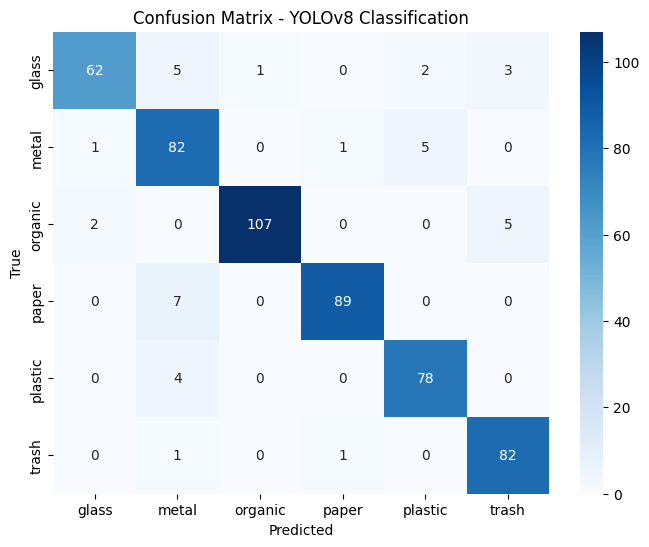

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ultralytics import YOLO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# =====================
# CONFIG
# =====================
MODEL_PATH = "runs/classify/train/weights/best.pt"
TEST_DIR = "/content/dataset/test"

CLASS_NAMES = ["glass", "metal", "organic", "paper", "plastic", "trash"]
CONF_THRESHOLD = 0.6

# =====================
# LOAD MODEL
# =====================
model = YOLO(MODEL_PATH)

y_true = []
y_pred = []

# =====================
# PREDICT TEST SET
# =====================
for cls in CLASS_NAMES:
    cls_dir = os.path.join(TEST_DIR, cls)

    for img_name in os.listdir(cls_dir):
        img_path = os.path.join(cls_dir, img_name)

        img = cv2.imread(img_path)
        if img is None:
            continue

        result = model(img, verbose=False)[0]
        probs = result.probs.data.cpu().numpy()

        y_true.append(CLASS_NAMES.index(cls))

        if probs.max() < CONF_THRESHOLD:
            y_pred.append(-1)   # không có rác
        else:
            y_pred.append(np.argmax(probs))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# =====================
# REJECT ANALYSIS
# =====================
num_reject = np.sum(y_pred == -1)
print(f"Reject (không có rác): {num_reject}/{len(y_pred)}")

mask = y_pred != -1
y_true_eval = y_true[mask]
y_pred_eval = y_pred[mask]

# =====================
# METRICS
# =====================
acc = accuracy_score(y_true_eval, y_pred_eval)
print(f"\nAccuracy (không tính reject): {acc*100:.2f}%")

print("\nClassification Report:")
print(
    classification_report(
        y_true_eval,
        y_pred_eval,
        target_names=CLASS_NAMES,
        digits=4
    )
)

# =====================
# CONFUSION MATRIX
# =====================
cm = confusion_matrix(y_true_eval, y_pred_eval)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=CLASS_NAMES,
    yticklabels=CLASS_NAMES
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - YOLOv8 Classification")
plt.show()
